In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
vertebral_column = pd.read_csv('VertebralColumn_3C.csv')

In [10]:
vertebral_column.head()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [11]:
vertebral_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [12]:
vertebral_column['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [13]:
independent_variable = vertebral_column.drop('class',axis=1)
target_variable = vertebral_column['class']

In [14]:
X_train_one, X_validation_one, y_train_one, y_validation_one = train_test_split(independent_variable,
                                                     target_variable, 
                                                     test_size=0.2,
                                                     random_state = 42)

In [15]:
classifier_one = DecisionTreeClassifier(criterion="entropy",random_state = 42,max_depth=8)


In [16]:
classifier_two = DecisionTreeClassifier(criterion="entropy",random_state = 42,max_depth=11)

In [17]:
X_train_two, X_validation_two, y_train_two, y_validation_two = train_test_split(independent_variable,
                                                     target_variable, 
                                                     test_size=0.3,
                                                     random_state = 42)

In [18]:
classifier_one.fit(X_train_one,y_train_one)


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [19]:
classifier_two.fit(X_train_two,y_train_two)

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)

In [20]:
feature_names =list(independent_variable.columns)
class_names = list(vertebral_column['class'].unique())

In [21]:
export_graphviz(classifier_one,out_file="Tree_one.dot"
                    ,feature_names = feature_names,
                    class_names =class_names, 
                    rounded = True,filled = True)

In [22]:
export_graphviz(classifier_two,out_file="Tree_two.dot"
                    ,feature_names = feature_names,
                    class_names =class_names, 
                    rounded = True,filled = True) 

In [23]:
y_pred_one = classifier_one.predict(X_validation_one)  

In [24]:
y_pred_two = classifier_two.predict(X_validation_two) 

In [46]:

result = accuracy_score(y_validation_one, y_pred_one) * 100
print("{:.2f}%".format(result) )




91.94%


In [26]:
print(classification_report(y_validation_one, y_pred_one))

                   precision    recall  f1-score   support

           Hernia       0.90      0.75      0.82        12
           Normal       0.81      0.94      0.87        18
Spondylolisthesis       1.00      0.97      0.98        32

         accuracy                           0.92        62
        macro avg       0.90      0.89      0.89        62
     weighted avg       0.93      0.92      0.92        62



In [50]:
result = accuracy_score(y_validation_two, y_pred_two) * 100
print("{:.2f}%".format(result) )




86.02%


In [27]:
print(classification_report(y_validation_two, y_pred_two))

                   precision    recall  f1-score   support

           Hernia       0.72      0.72      0.72        18
           Normal       0.74      0.71      0.72        24
Spondylolisthesis       0.96      0.98      0.97        51

         accuracy                           0.86        93
        macro avg       0.81      0.80      0.81        93
     weighted avg       0.86      0.86      0.86        93



In [28]:
vertebral_column['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [29]:
cm_one =confusion_matrix(y_validation_one, y_pred_one)
cm_two =confusion_matrix(y_validation_two, y_pred_two)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
# Function to plot a confusion Matrix
# Directly copied from the Scikit Learn website
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[ 9  3  0]
 [ 1 17  0]
 [ 0  1 31]]


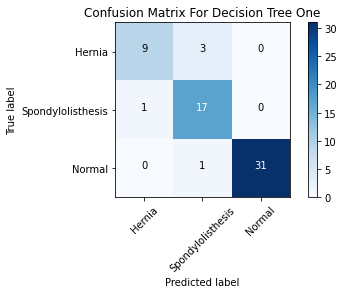

In [31]:
cm_plot_labels = class_names
plot_confusion_matrix(cm=cm_one, classes=cm_plot_labels, title='Confusion Matrix For Decision Tree One')

Confusion matrix, without normalization
[[13  5  0]
 [ 5 17  2]
 [ 0  1 50]]


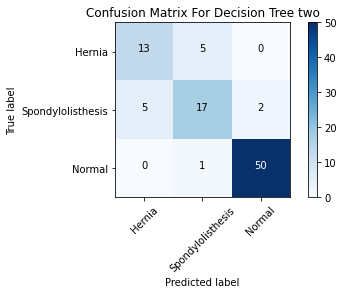

In [32]:
plot_confusion_matrix(cm=cm_two, classes=cm_plot_labels, title='Confusion Matrix For Decision Tree two')

In [33]:
independent_variable = vertebral_column.drop(['class','sacral_slope', 'pelvic_radius','degree_spondylolisthesis'],axis=1)
target_variable = vertebral_column['class']

In [34]:
X_train, X_validation, y_train, y_validation = train_test_split(independent_variable,
                                                     target_variable, 
                                                     test_size=0.3,
                                                     random_state = 42)

In [35]:
classifier_three = DecisionTreeClassifier(criterion="entropy",random_state = 42,max_depth=8)

In [36]:
classifier_one.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [37]:
feature_names = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle']
export_graphviz(classifier_one,out_file="Tree_three.dot"
                    ,feature_names = feature_names,
                    class_names =class_names, 
                    rounded = True,filled = True)

In [38]:
y_pred_three = classifier_one.predict(X_validation)

In [39]:
print(classification_report(y_validation, y_pred_three))

                   precision    recall  f1-score   support

           Hernia       0.44      0.44      0.44        18
           Normal       0.37      0.42      0.39        24
Spondylolisthesis       0.77      0.73      0.75        51

         accuracy                           0.59        93
        macro avg       0.53      0.53      0.53        93
     weighted avg       0.60      0.59      0.60        93



In [51]:
result = accuracy_score(y_validation, y_pred_three)* 100
print("{:.2f}%".format(result) )


59.14%
